In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

            exam1       exam2    decision
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


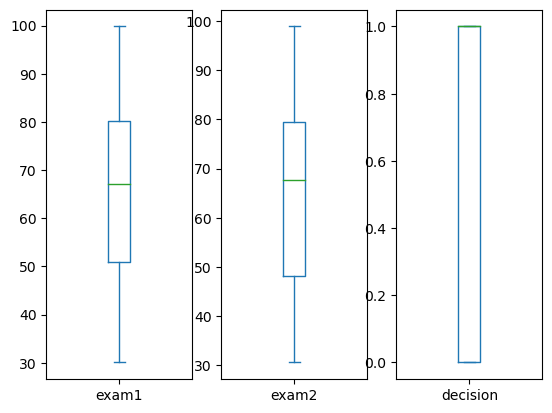

In [2]:
data = pandas.read_csv('acceptance_data.txt', names = ['exam1','exam2','decision'])

# Step 1
print(data.describe())
data.plot(kind='box', subplots=True)
plot.show()

In [8]:
# Steps 2 and 3
X = data.drop(columns=['decision']).round(2)
y = data['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#xmin = X_train.min()
#xmax = X_train.max()
#X_train = (X_train - xmin) / (xmax- xmin)
#X_test = (X_test - xmin) / (xmax - xmin)

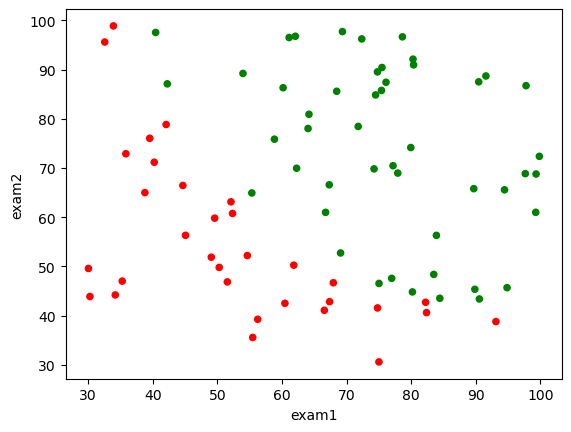

In [9]:
getColor = lambda x: 'red' if x == 0 else 'green'
color = list(map(getColor, y_train))
X_train.plot(kind='scatter', x='exam1', y='exam2', c=color)
plot.show()

In [10]:
X_train_df = X_train.copy()
y_train_df = y_train.copy()

X_train = X_train.to_numpy().reshape((-1,2))
X_test = X_test.to_numpy().reshape((-1,2))
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [11]:
# Step 4
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [12]:
# Step 5
y_pred = model.predict(X_test)
print("Acc. of KNN: ", model.score(X_test,y_test))

Acc. of KNN:  0.8


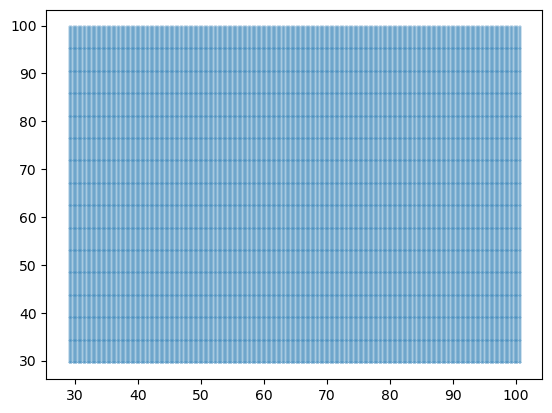

In [13]:
x1_min, x1_max = X_train_df['exam1'].min() - 1, X_train_df['exam1'].max() + 1
x2_min, x2_max = X_train_df['exam2'].min() - 1, X_train_df['exam2'].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2), np.arange(x2_min, x2_max, 0.2))
plot.scatter(x1, x2, s=0.02)
plot.show()

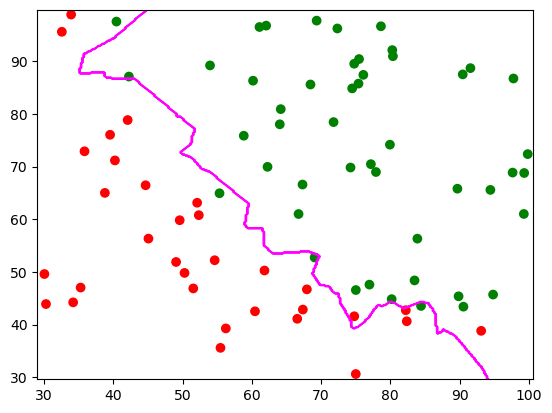

In [14]:
xx = np.stack((x1.ravel(),x2.ravel()),axis=1)
yy = model.predict(xx)

plot.contour(x1, x2, yy.reshape((x1.shape[0],x2.shape[1])), linewidths=1, colors='magenta')
color = list(map(getColor, y_train_df))
plot.scatter(x=X_train_df['exam1'], y=X_train_df['exam2'], c=color)
plot.show()

In [15]:
# Step 4
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

In [16]:
# Step 5
print("Acc. of NB: ", model2.score(X_test,y_test))

Acc. of NB:  0.8


In [17]:
print(model2.class_count_)
print(model2.class_prior_)
print(model2.theta_)  # mean of each feature per class (classes x features), var_

[32. 48.]
[0.4 0.6]
[[52.6753125  54.465     ]
 [76.12270833 73.9475    ]]


In [18]:
# Step 6
new_x = np.array([45, 68])
print(model.predict([new_x]))

new_x = np.array([71, 88])
print(model2.predict([new_x]))

[0]
[1]
